# Phase 2: Joint Pre/Post-Surgery Therapy Prediction


- **Target 1 column - Wirkstoffschema neoadjuvante Therapie (BO) = Neoadjuvant Therapy Drug Scheme**

- **Target column 2 - Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase = Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis**



## Data Preparation and Preprocessing (same as phase 1)

### 1. Load the Dataset
 - Load the dataset from the specified CSV file using pandas. Make sure to handle the encoding correctly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = r"/content/drive/MyDrive/Colab Notebooks/2025Summer/Convoloo/Studiendaten für Similarity analyse neu.xlsx"

import pandas as pd

df_raw = pd.read_excel(file_path)
df_raw.head()

Mounted at /content/drive


,Eingangsbuchnummer,Zugehörigkeit zu Studie,Geschlecht,Alter des Patienten bei Diagnose,Geburtsdatum,OP Datum,Progress,Progress Datum,Nachsorge Datum,PFS,...,Tumormarker 1,Tumormarker 2,neoadjuvante Chemotherapie,Wirkstoffschema neoadjuvante Therapie,Therapieerfolg neoadjuvante Therapie,adjuvante Chemotherapie,Wirkstoffschema adjuvante Therapie,Vorerkrankungen,Adjuvante Therapie des Primärtumors oder vorhergeganener Metastase,Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase
0,3958,SpheroPCT,weiblich,65,1940-07-28 00:00:00,2006-01-25 00:00:00,nein,kein Progress,2016-08-25 00:00:00,127,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,3990,SpheroPCT,männlich,71,1934-08-05 00:00:00,2006-04-28 00:00:00,nein,kein Progress,2015-11-28 00:00:00,115,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,4001,SpheroPCT,männlich,70,1935-05-05 00:00:00,2006-05-22 00:00:00,nein,kein Progress,2013-01-22 00:00:00,80,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,3992,SpheroPCT,männlich,64,1942-04-11 00:00:00,2006-05-08 00:00:00,nein,kein Progress,2016-06-08 00:00:00,121,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,4028,SpheroPCT,männlich,62,1944-07-13 00:00:00,2006-09-19 00:00:00,nein,kein Progress,19-Oct-2008,25,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 44 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Eingangsbuchnummer                                                                        673 non-null    object
 1   Zugehörigkeit zu Studie                                                                   673 non-null    object
 2   Geschlecht                                                                                673 non-null    object
 3   Alter des Patienten bei Diagnose                                                          673 non-null    object
 4   Geburtsdatum                                                                              673 non-null    object
 5   OP Datum                                                        

### 2. Translate all the column names in English

In [3]:
column_translation = {
    "Eingangsbuchnummer": "Entry Number",
    "Zugehörigkeit zu Studie": "Study Affiliation",
    "Geschlecht": "Gender",
    "Alter des Patienten bei Diagnose": "Age at Diagnosis",
    "Geburtsdatum": "Birth Date",
    "OP Datum": "Surgery Date",
    "Progress": "Progress",
    "Progress Datum": "Progress Date",
    "Nachsorge Datum": "Follow-up Date",
    "PFS": "Progression-Free Survival",
    "early Progress 1=nein; 2= ja": "Early Progress",
    "Vitalstatus": "Vital Status",
    "Tumorbedingt verstorben": "Tumor-related Death",
    "Todesdatum": "Date of Death",
    "OS": "Overall Survival (OS)",
    "BMI": "Body Mass Index (BMI)",
    "Hauptdiagnose PT": "Primary Diagnosis PT",
    "Sample type": "Sample Type",
    "Sample site": "Sample Site",
    "Histologie": "Histology",
    "T-Status": "T Status",
    "N-Status": "N Status",
    "M-Status": "M Status",
    "V-Status": "V Status",
    "L-Status": "L Status",
    "Pn-Status": "Pn Status",
    "Grading ": "Grading",
    "R-Status ": "R Status",
    "Tumorseite": "Tumor Side",
    "Tumor/Metastasen Durchmesser": "Tumor/Metastasis Diameter",
    "synchrone oder metachrone Metastasierung": "Synchronous or Metachronous Metastasis",
    "Anzahl Metastasen intrahepatisch": "Number of Intrahepatic Metastases",
    "Anzahl Metastasen extrahepatisch": "Number of Extrahepatic Metastases",
    "Ort metastasen extrahepatisch": "Site of Extrahepatic Metastases",
    "Tumormarker 1 ": "Tumor Marker 1",
    "Tumormarker 2": "Tumor Marker 2",
    "neoadjuvante Chemotherapie": "Neoadjuvant Chemotherapy",
    "Wirkstoffschema neoadjuvante Therapie": "Neoadjuvant Therapy Drug Scheme",
    "Therapieerfolg neoadjuvante Therapie": "Therapy Success Neoadjuvant",
    "adjuvante Chemotherapie": "Adjuvant Chemotherapy",
    "Wirkstoffschema adjuvante Therapie": "Adjuvant Therapy Drug Scheme",
    "Vorerkrankungen": "Pre-existing Conditions",
    "Adjuvante Therapie des Primärtumors oder vorhergeganener Metastase": "Adjuvant Therapy of Primary Tumor or Prior Metastasis",
    "Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase": "Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"
}

df_translated = df_raw.rename(columns=column_translation)
df_translated.head()

,Entry Number,Study Affiliation,Gender,Age at Diagnosis,Birth Date,Surgery Date,Progress,Progress Date,Follow-up Date,Progression-Free Survival,...,Tumor Marker 1,Tumor Marker 2,Neoadjuvant Chemotherapy,Neoadjuvant Therapy Drug Scheme,Therapy Success Neoadjuvant,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Pre-existing Conditions,Adjuvant Therapy of Primary Tumor or Prior Metastasis,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
0,3958,SpheroPCT,weiblich,65,1940-07-28 00:00:00,2006-01-25 00:00:00,nein,kein Progress,2016-08-25 00:00:00,127,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,3990,SpheroPCT,männlich,71,1934-08-05 00:00:00,2006-04-28 00:00:00,nein,kein Progress,2015-11-28 00:00:00,115,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,4001,SpheroPCT,männlich,70,1935-05-05 00:00:00,2006-05-22 00:00:00,nein,kein Progress,2013-01-22 00:00:00,80,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,3992,SpheroPCT,männlich,64,1942-04-11 00:00:00,2006-05-08 00:00:00,nein,kein Progress,2016-06-08 00:00:00,121,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,4028,SpheroPCT,männlich,62,1944-07-13 00:00:00,2006-09-19 00:00:00,nein,kein Progress,19-Oct-2008,25,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [4]:
df_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 44 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Entry Number                                                          673 non-null    object
 1   Study Affiliation                                                     673 non-null    object
 2   Gender                                                                673 non-null    object
 3   Age at Diagnosis                                                      673 non-null    object
 4   Birth Date                                                            673 non-null    object
 5   Surgery Date                                                          673 non-null    object
 6   Progress                                                              673 non-null    object
 7   Progress

### 3. Drop Unnecessary Columns
 - Find and remove columns that are not needed for the analysis. Write down why you removed each column.

I dropped the unnecessary columns before handling the encoding. The followings are unnecessary columns and the reasons why they might be dropped.

- "Entry Number": ID column with no analytical value

- “Birth Date": Duplicated info via age

- "Surgery Date": This is a timestamp. Since we are only focused on treatment types (“Neoadjuvant Therapy Drug Scheme”) and not on when the treatment occurred, then this date doesn't directly contribute to drug scheme classification

- "Progress Date": This is a timestamp, and it describes when the tumor progressed. But for now, we only care whether there was progress, not when

- "Follow-up Date": This is a timestamp, and it marks the last check-up date, which does not influence or explain what drug scheme was used before surgery

- "Date of Death": This is a timestamp, and "Overall Survival (OS)" has already included this info

In [5]:
columns_to_drop = [
    "Entry Number",
    "Birth Date",
    "Surgery Date",
    "Progress Date",
    "Follow-up Date",
    "Date of Death"
]

df_dropped = df_translated.drop(columns=columns_to_drop)
df_dropped.head()

,Study Affiliation,Gender,Age at Diagnosis,Progress,Progression-Free Survival,Early Progress,Vital Status,Tumor-related Death,Overall Survival (OS),Body Mass Index (BMI),...,Tumor Marker 1,Tumor Marker 2,Neoadjuvant Chemotherapy,Neoadjuvant Therapy Drug Scheme,Therapy Success Neoadjuvant,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Pre-existing Conditions,Adjuvant Therapy of Primary Tumor or Prior Metastasis,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
0,SpheroPCT,weiblich,65,nein,127,kein Progress,lebt noch,lebt noch,127,26.078972,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
1,SpheroPCT,männlich,71,nein,115,kein Progress,lebt noch,lebt noch,115,32.179931,...,CEA im Normbereich,CA19-9 pathologisch,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
2,SpheroPCT,männlich,70,nein,80,kein Progress,lebt noch,lebt noch,80,28.395062,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt
3,SpheroPCT,männlich,64,nein,121,kein Progress,lebt noch,lebt noch,121,28.405504,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,nein,entfällt,entfällt
4,SpheroPCT,männlich,62,nein,25,kein Progress,lebt noch,lebt noch,25,25.155896,...,CEA im Normbereich,CA19-9 im Normbereich,entfällt,entfällt,entfällt,keine,keine,ja,entfällt,entfällt


In [6]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 38 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Study Affiliation                                                     673 non-null    object
 1   Gender                                                                673 non-null    object
 2   Age at Diagnosis                                                      673 non-null    object
 3   Progress                                                              673 non-null    object
 4   Progression-Free Survival                                             673 non-null    object
 5   Early Progress                                                        673 non-null    object
 6   Vital Status                                                          673 non-null    object
 7   Tumor-re

### 4. Process the data in each column

- Convert all string values to lowercase

- Handle the encoding problem

In [7]:
# convert all string values to lowercase
df = df_dropped.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-1068992050.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_dropped.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [8]:
# Handle the encoding problem
df = df.replace(to_replace=["k.a", "keine angabe"], value="k.a.", regex=False)

**Special Case:** "Adjuvant Therapy Drug Scheme"

In [9]:
df["Adjuvant Therapy Drug Scheme"].unique()

array(['keine', 'folfox 4', 'xelox + bevacizumab', 'xelox', 'folfox4',
       'capecitabin mono', 'folfox-4', 'capecitabine mono', 'folfox 6',
       'capiri + bevacizumab', '5-fu/fa', 'folfox', 'folfox-6+cetuximab',
       'n.r.', 'folfiri+cetuximab', 'capecitabine+bevacizumab',
       'bevacizumab+capecitabine',
       'folfiri + cetuximab (fire iii studie arm a)',
       'folfiri+bevacizumab', 'folfox+bevacizumab', 'folfiri',
       'irinotecan + xeloda + cetuximab (xeloda pausiert seit 9/11,cetuximab pausiert seit 12/11)',
       '5-fu+folinsäure', 'irinotecan+cetuximab',
       'capecitabine+oxaliplatin', 'oxaliplatin+capecitabine+bevacizumab',
       'capecitabine', 'capecitabin+oxaliplatin+cetuximab',
       'oxaliplatin+ capecitabine',
       'oxalipl.130mg/m² + capecitabine 1000mg/m² ',
       'folfiri+panitumumab',
       'oxalipl.130mg/m² + capecitabine 2000mg/m² ', 'folfox+cetuximab',
       'vakzinierung l-blp25 (licc-studie)',
       'vakzinierung l-blp25, placebo (licc-s

In [10]:
# Handle space and dash manually
df["Adjuvant Therapy Drug Scheme"] = df["Adjuvant Therapy Drug Scheme"].replace(
    {"folfox 4": "folfox4",
     "folfox 6": "folfox6",
     "folfox-4": "folfox4"}
)

# Verify the replacement
df["Adjuvant Therapy Drug Scheme"].unique()

array(['keine', 'folfox4', 'xelox + bevacizumab', 'xelox',
       'capecitabin mono', 'capecitabine mono', 'folfox6',
       'capiri + bevacizumab', '5-fu/fa', 'folfox', 'folfox-6+cetuximab',
       'n.r.', 'folfiri+cetuximab', 'capecitabine+bevacizumab',
       'bevacizumab+capecitabine',
       'folfiri + cetuximab (fire iii studie arm a)',
       'folfiri+bevacizumab', 'folfox+bevacizumab', 'folfiri',
       'irinotecan + xeloda + cetuximab (xeloda pausiert seit 9/11,cetuximab pausiert seit 12/11)',
       '5-fu+folinsäure', 'irinotecan+cetuximab',
       'capecitabine+oxaliplatin', 'oxaliplatin+capecitabine+bevacizumab',
       'capecitabine', 'capecitabin+oxaliplatin+cetuximab',
       'oxaliplatin+ capecitabine',
       'oxalipl.130mg/m² + capecitabine 1000mg/m² ',
       'folfiri+panitumumab',
       'oxalipl.130mg/m² + capecitabine 2000mg/m² ', 'folfox+cetuximab',
       'vakzinierung l-blp25 (licc-studie)',
       'vakzinierung l-blp25, placebo (licc-studie)',
       'folfox+p

### 5. Convert Data Types
- Verify the data types of all columns in the DataFrame to ensure they match the data they contain. For example, if a column holds categorical data, its data type should be set to 'category'. If a column contains numerical data, adjust its data type accordingly.

In [11]:
df.dtypes

,0
Study Affiliation,object
Gender,object
Age at Diagnosis,object
Progress,object
Progression-Free Survival,object
Early Progress,object
Vital Status,object
Tumor-related Death,object
Overall Survival (OS),object
Body Mass Index (BMI),object


In [12]:
df["Study Affiliation"] = df["Study Affiliation"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Progress"] = df["Progress"].astype("category")
df["Early Progress (1 = No; 2 = Yes)"] = df["Early Progress"].astype("category")
df["Vital Status"] = df["Vital Status"].astype("category")
df["Tumor-related Death"] = df["Tumor-related Death"].astype("category")
df["Primary Diagnosis PT"] = df["Primary Diagnosis PT"].astype("category")
df["Sample Type"] = df["Sample Type"].astype("category")
df["Sample Site"] = df["Sample Site"].astype("category")
df["Histology"] = df["Histology"].astype("category")
df["T Status"] = df["T Status"].astype("category")
df["N Status"] = df["N Status"].astype("category")
df["M Status"] = df["M Status"].astype("category")
df["V Status"] = df["V Status"].astype("category")
df["L Status"] = df["L Status"].astype("category")
df["Pn Status"] = df["Pn Status"].astype("category")
df["Grading"] = df["Grading"].astype("category")
df["R Status"] = df["R Status"].astype("category")
df["Tumor Side"] = df["Tumor Side"].astype("category")
df["Synchronous or Metachronous Metastasis"] = df["Synchronous or Metachronous Metastasis"].astype("category")
df["Site of Extrahepatic Metastases"] = df["Site of Extrahepatic Metastases"].astype("category")
df["Tumor Marker 1"] = df["Tumor Marker 1"].astype("category")
df["Tumor Marker 2"] = df["Tumor Marker 2"].astype("category")
df["Neoadjuvant Chemotherapy"] = df["Neoadjuvant Chemotherapy"].astype("category")
df["Neoadjuvant Therapy Drug Scheme"] = df["Neoadjuvant Therapy Drug Scheme"].astype("category")
df["Therapy Success Neoadjuvant"] = df["Therapy Success Neoadjuvant"].astype("category")
df["Adjuvant Chemotherapy"] = df["Adjuvant Chemotherapy"].astype("category")
df["Adjuvant Therapy Drug Scheme"] = df["Adjuvant Therapy Drug Scheme"].astype("category")
df["Pre-existing Conditions"] = df["Pre-existing Conditions"].astype("category")
df["Adjuvant Therapy of Primary Tumor or Prior Metastasis"] = df["Adjuvant Therapy of Primary Tumor or Prior Metastasis"].astype("category")
df["Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"] = df["Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis"].astype("category")

In [13]:
df["Age at Diagnosis"] = pd.to_numeric(df["Age at Diagnosis"], errors="coerce")
df["Overall Survival (OS)"] = pd.to_numeric(df["Overall Survival (OS)"], errors="coerce")
df["Body Mass Index (BMI)"] = pd.to_numeric(df["Body Mass Index (BMI)"], errors="coerce")
df["Tumor/Metastasis Diameter"] = pd.to_numeric(df["Tumor/Metastasis Diameter"], errors="coerce")
df["Number of Intrahepatic Metastases"] = pd.to_numeric(df["Number of Intrahepatic Metastases"], errors="coerce")
df["Number of Extrahepatic Metastases"] = pd.to_numeric(df["Number of Extrahepatic Metastases"], errors="coerce")

In [14]:
df.dtypes

,0
Study Affiliation,category
Gender,category
Age at Diagnosis,float64
Progress,category
Progression-Free Survival,object
Early Progress,object
Vital Status,category
Tumor-related Death,category
Overall Survival (OS),float64
Body Mass Index (BMI),float64


### 6. Show NaN Values Information in a Chart
 - Visualize the distribution of NaN values across the dataset using a bar chart or similar visualization to easily identify which features contain missing data.


In [15]:
nan_values = df.isnull().sum()
print("Missing values per column:")
print(nan_values[nan_values > 0])

Missing values per column:
Age at Diagnosis                      20
Overall Survival (OS)                227
Body Mass Index (BMI)                 98
Tumor/Metastasis Diameter            246
Number of Intrahepatic Metastases    589
Number of Extrahepatic Metastases    673
dtype: int64


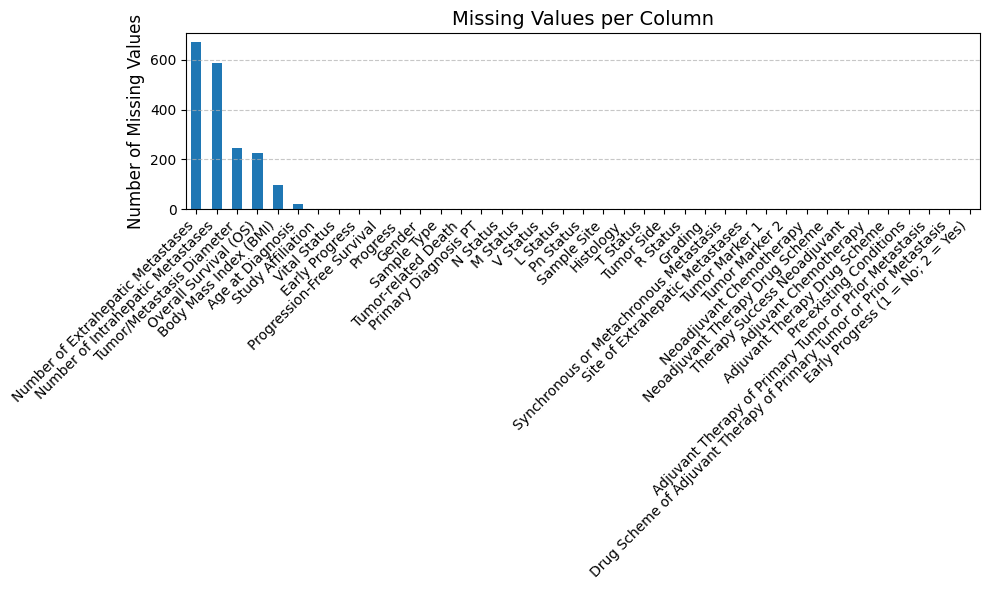

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
nan_values.sort_values(ascending=False).plot(kind='bar')

plt.title("Missing Values per Column", fontsize=14)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Handle NaN Values
 - Identify and handle any NaN values in the dataset. Decide whether to fill them with appropriate values (mean, median, or mode) or to drop the rows/columns containing them based on the context.

 - categorical feature --> mode is better

 - continuous/nuerical feature --> median is better


`Tumor/Metastasis Diameter`:

We chose to impute the missing values in the `Tumor/Metastasis Diameter` column using the median value.


In [17]:
# Tumor/Metastasis Diameter
median_value = df["Tumor/Metastasis Diameter"].median()
df["Tumor/Metastasis Diameter"] = df["Tumor/Metastasis Diameter"].fillna(median_value)

`Overall Survival (OS)`:

The missing values in the `Overall Survival (OS)` column were replaced with 0. This approach assumes that missing OS values correspond to cases where survival data was not recorded or not available, and we treat them as having no observed survival duration.





In [18]:
# Overall Survival (OS)
df["Overall Survival (OS)"] = df["Overall Survival (OS)"].fillna(0)

`Number of Extrahepatic Metastases`:

replace missing values with 0


In [19]:
# Number of Extrahepatic Metastases
df["Number of Extrahepatic Metastases"] = df["Number of Extrahepatic Metastases"].fillna(0)

`Number of Intrahepatic Metastases`:

replace missing values with 0

In [20]:
# Number of Intrahepatic Metastases
df["Number of Intrahepatic Metastases"] = df["Number of Intrahepatic Metastases"].fillna(0)

`Body Mass Index (BMI)`:

**assign the median to all the missing values**

In [21]:
# Body Mass Index (BMI)
bmi_median = df["Body Mass Index (BMI)"].median()
df["Body Mass Index (BMI)"] = df["Body Mass Index (BMI)"].fillna(bmi_median)

`Age at Diagnosis`:

**assign the median to all the missing values**


In [22]:
# Age at Diagnosis
age_median = df["Age at Diagnosis"].median()
df["Age at Diagnosis"] = df["Age at Diagnosis"].fillna(age_median)

check to make sure there is no missing values

In [23]:
nan_values_after = df.isnull().sum()
print("Missing values per column:")
print(nan_values_after[nan_values_after > 0])

Missing values per column:
Series([], dtype: int64)


### 8. Perform Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

# Make a copy to avoid changing original data
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

In [25]:
print(df_encoded.head())

   Study Affiliation  Gender  Age at Diagnosis  Progress  \
0                  3       1              65.0         2   
1                  3       0              71.0         2   
2                  3       0              70.0         2   
3                  3       0              64.0         2   
4                  3       0              62.0         2   

   Progression-Free Survival  Early Progress  Vital Status  \
0                         47               2             9   
1                         32               2             9   
2                        270               2             9   
3                         44               2             9   
4                        114               2             9   

   Tumor-related Death  Overall Survival (OS)  Body Mass Index (BMI)  ...  \
0                    3                  127.0              26.078972  ...   
1                    3                  115.0              32.179931  ...   
2                    3             

In [26]:
print(df_encoded.dtypes)

Study Affiliation                                                         int64
Gender                                                                    int64
Age at Diagnosis                                                        float64
Progress                                                                  int64
Progression-Free Survival                                                 int64
Early Progress                                                            int64
Vital Status                                                              int64
Tumor-related Death                                                       int64
Overall Survival (OS)                                                   float64
Body Mass Index (BMI)                                                   float64
Primary Diagnosis PT                                                      int64
Sample Type                                                               int64
Sample Site                             

### 9. Find Correlation Between Features
 - Calculate the correlation between the features in the dataset. This will help identify relationships between variables.

In [27]:
corr_matrix = df_encoded.corr()
corr_matrix

,Study Affiliation,Gender,Age at Diagnosis,Progress,Progression-Free Survival,Early Progress,Vital Status,Tumor-related Death,Overall Survival (OS),Body Mass Index (BMI),...,Tumor Marker 2,Neoadjuvant Chemotherapy,Neoadjuvant Therapy Drug Scheme,Therapy Success Neoadjuvant,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Pre-existing Conditions,Adjuvant Therapy of Primary Tumor or Prior Metastasis,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis,Early Progress (1 = No; 2 = Yes)
Study Affiliation,1.000000,-0.133991,0.112120,0.276096,0.114097,-0.180546,-0.242741,-0.130319,0.004237,0.121676,...,-0.494856,-0.895654,-0.668367,-0.609537,-0.041155,0.273243,0.263957,-0.714965,-0.516754,-0.180546
Gender,-0.133991,1.000000,-0.255359,-0.542441,0.326238,-0.339849,-0.420013,-0.487339,-0.366781,-0.085009,...,0.170082,0.313649,0.001331,0.321576,-0.537654,-0.483467,-0.349710,-0.267558,-0.212644,-0.339849
Age at Diagnosis,0.112120,-0.255359,1.000000,0.393712,-0.272451,0.308673,0.256810,0.297927,0.243325,0.082882,...,-0.205844,-0.191863,0.132955,-0.205207,0.402776,0.232134,0.299388,0.039603,0.019382,0.308673
Progress,0.276096,-0.542441,0.393712,1.000000,-0.568901,0.706036,0.579375,0.642730,0.645024,0.122300,...,-0.378085,-0.365529,0.207935,-0.349381,0.768404,0.581728,0.839213,0.083008,0.066088,0.706036
Progression-Free Survival,0.114097,0.326238,-0.272451,-0.568901,1.000000,-0.672215,-0.529102,-0.551684,-0.383157,-0.106812,...,0.152536,-0.034811,-0.410870,0.045024,-0.607905,-0.379142,-0.605971,-0.256786,-0.165179,-0.672215
Early Progress,-0.180546,-0.339849,0.308673,0.706036,-0.672215,1.000000,0.586024,0.595735,0.631164,0.029895,...,-0.172934,0.110854,0.577391,-0.003946,0.681582,0.342134,0.781201,0.259092,0.175776,1.000000
Vital Status,-0.242741,-0.420013,0.256810,0.579375,-0.529102,0.586024,1.000000,0.922338,0.460166,0.036390,...,-0.070983,0.036046,0.367335,-0.081644,0.666243,0.457420,0.473679,0.526638,0.387722,0.586024
Tumor-related Death,-0.130319,-0.487339,0.297927,0.642730,-0.551684,0.595735,0.922338,1.000000,0.494275,0.043543,...,-0.159374,-0.069854,0.306559,-0.158356,0.693851,0.506954,0.523525,0.452096,0.329267,0.595735
Overall Survival (OS),0.004237,-0.366781,0.243325,0.645024,-0.383157,0.631164,0.460166,0.494275,1.000000,0.009396,...,-0.322481,-0.082216,0.302597,-0.136142,0.557643,0.358907,0.577789,0.178736,0.118023,0.631164
Body Mass Index (BMI),0.121676,-0.085009,0.082882,0.122300,-0.106812,0.029895,0.036390,0.043543,0.009396,1.000000,...,-0.085307,-0.128064,-0.038650,-0.103711,0.085494,0.094337,0.069079,-0.043894,-0.022746,0.029895



### 10. Draw Correlation Chart
 - Visualize the correlation matrix using a heatmap or other suitable chart to provide a clear representation of the relationships between features.

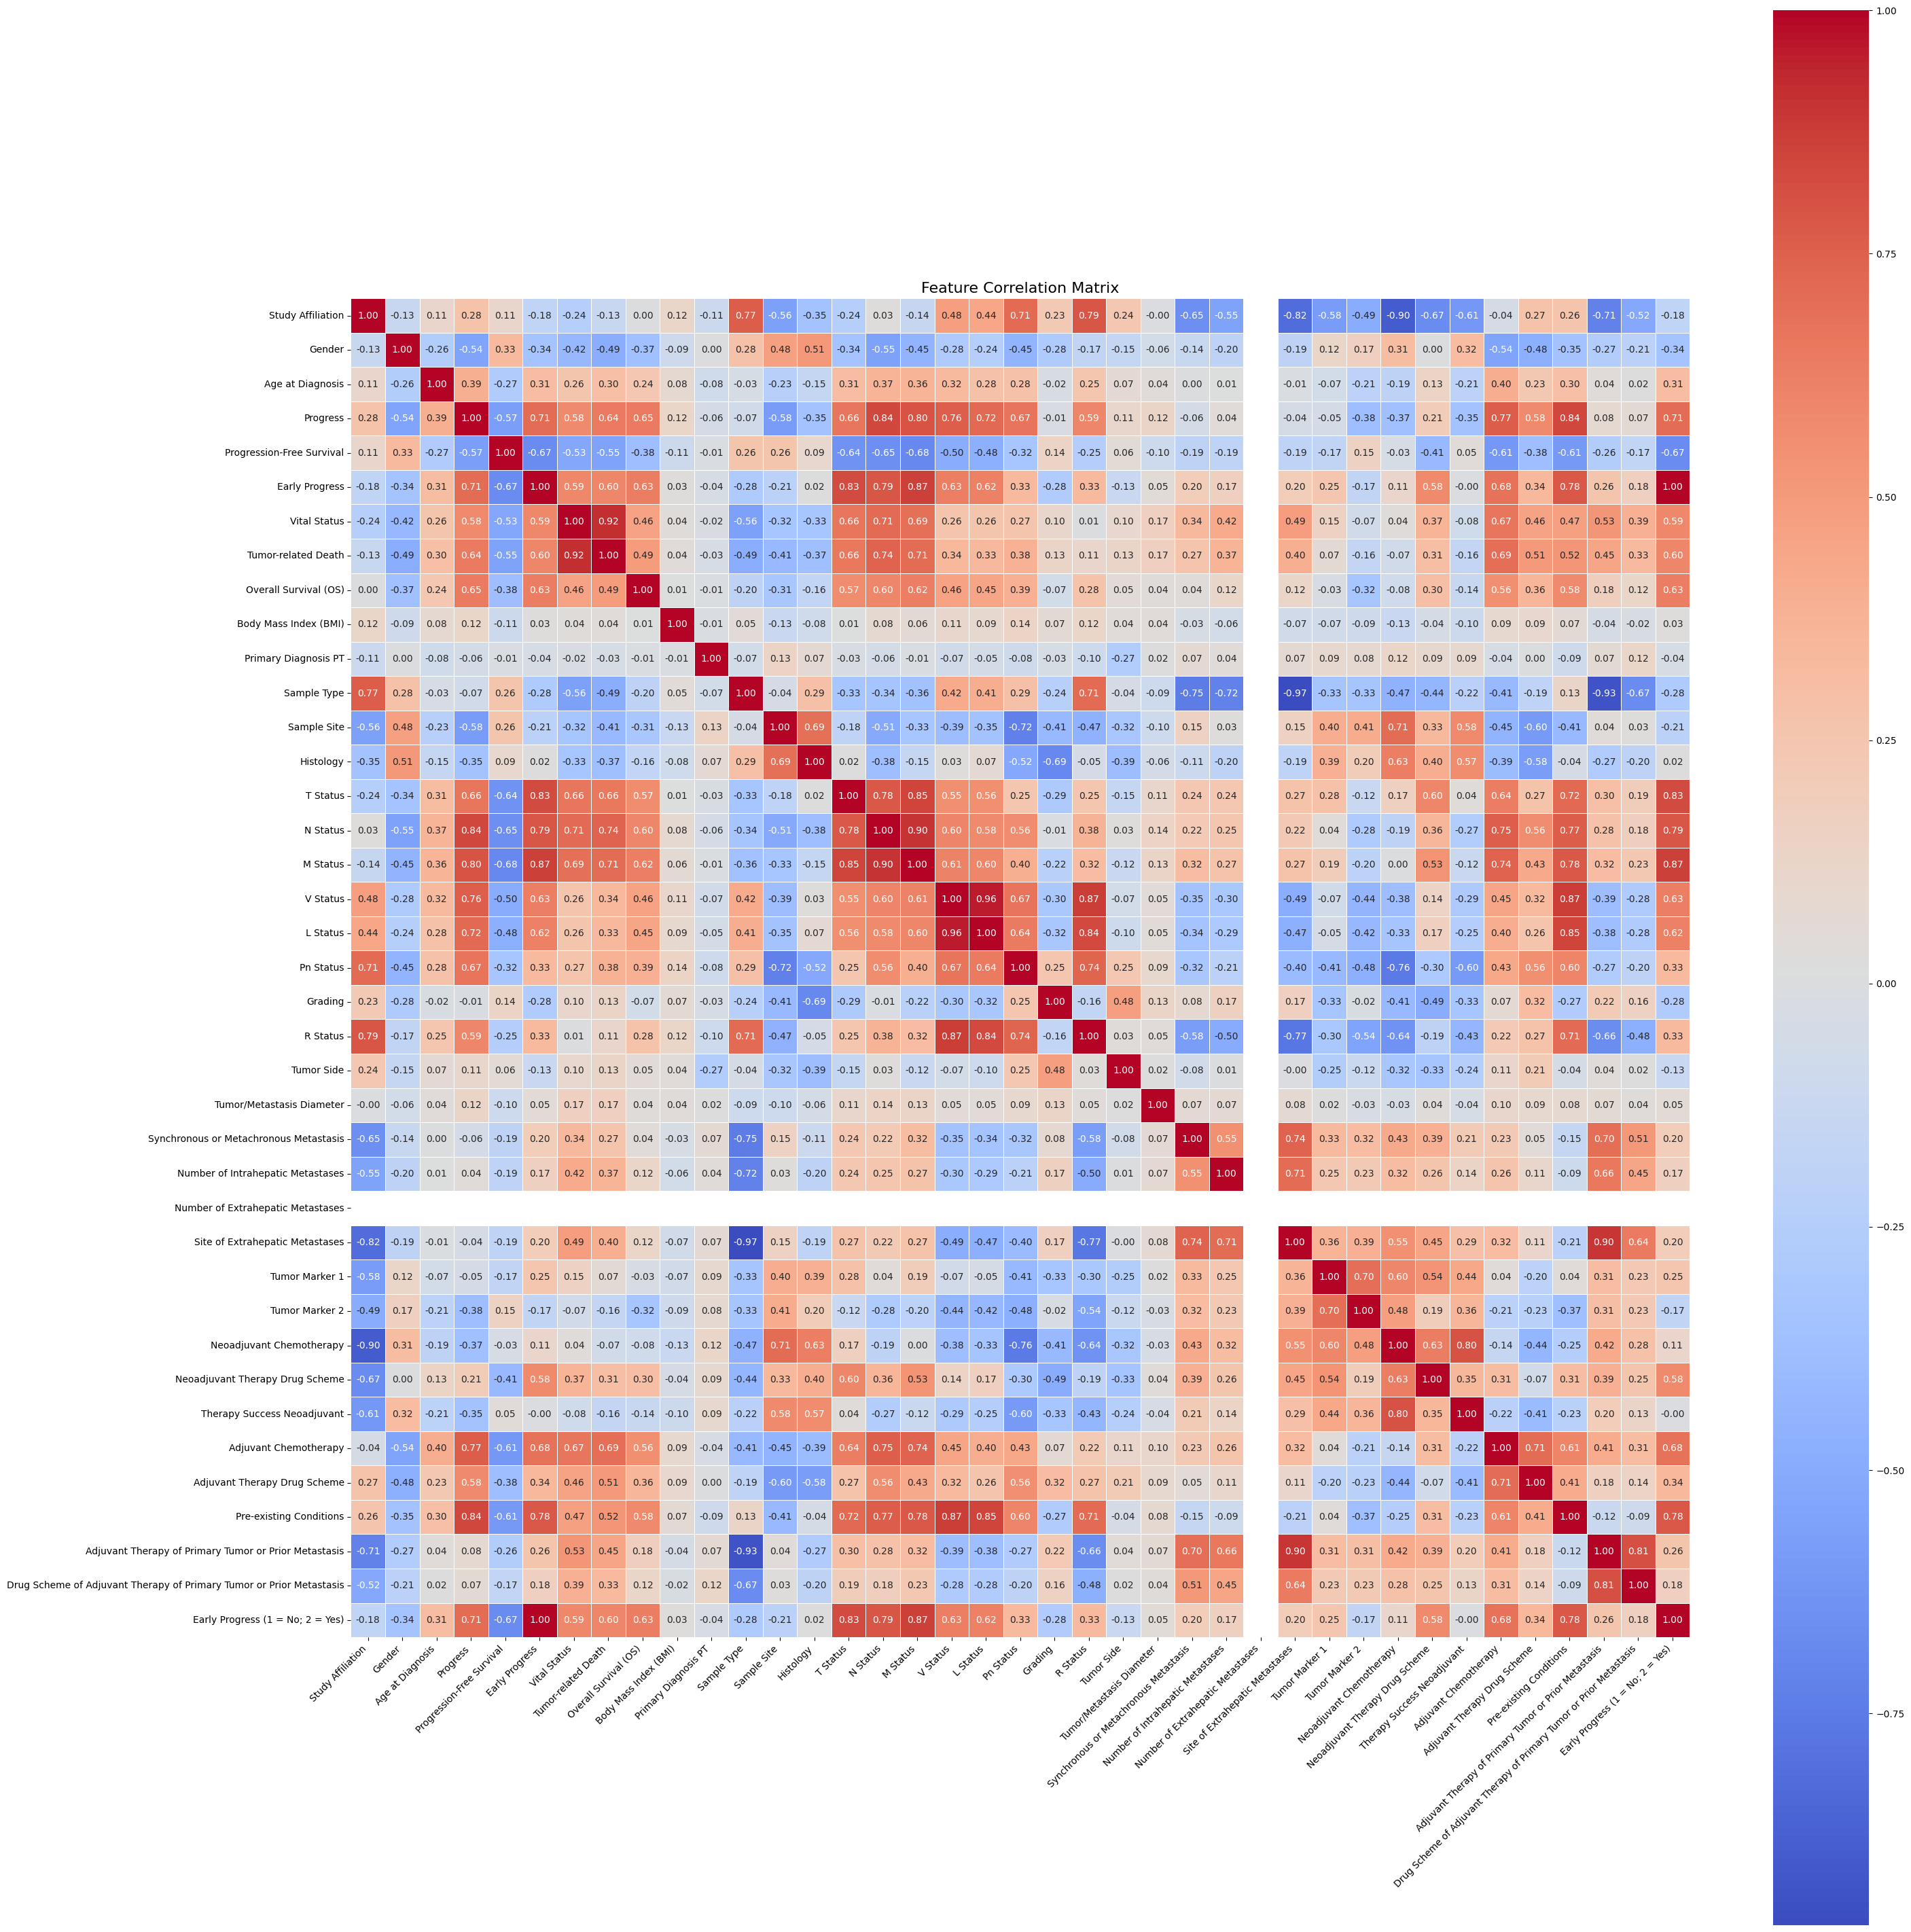

In [28]:
import seaborn as sns

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Phase 2


### 11. Find the Best Threshold Value
 - Analyze the features to determine the optimal threshold value that minimizes the feature set while maintaining performance.

*write a if statement to protect our target column not been dropped*

**Target 1 column - Wirkstoffschema neoadjuvante Therapie (BO) = Neoadjuvant Therapy Drug Scheme**

**Target column 2 - Wirkstoffschema der Adjuvanten Therapie des Primärtumors oder vorhergegangener Metastase = Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis**



In [29]:
corr_matrix1 = corr_matrix.abs()

import numpy as np

upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(bool))

threshold = 0.80
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop2 = [column for column in upper.columns
           if any(upper[column] > threshold) and column != 'Neoadjuvant Therapy Drug Scheme' and column != 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']

print("Features to drop due to high correlation:")
print(to_drop2)

#df_reduced = df.drop(columns=to_drop)
df_encoded_reduced2 = df_encoded.drop(columns=to_drop2)

Features to drop due to high correlation:
['Tumor-related Death', 'T Status', 'N Status', 'M Status', 'L Status', 'R Status', 'Site of Extrahepatic Metastases', 'Neoadjuvant Chemotherapy', 'Therapy Success Neoadjuvant', 'Pre-existing Conditions', 'Adjuvant Therapy of Primary Tumor or Prior Metastasis', 'Early Progress (1 = No; 2 = Yes)']


### 12. Show Features After Removing Correlated Features
 - Present the final set of features after removing those that are highly correlated based on the optimal threshold value. This will help in refining the dataset for further analysis.


In [30]:
df_encoded_reduced2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 27 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Study Affiliation                                                     673 non-null    int64  
 1   Gender                                                                673 non-null    int64  
 2   Age at Diagnosis                                                      673 non-null    float64
 3   Progress                                                              673 non-null    int64  
 4   Progression-Free Survival                                             673 non-null    int64  
 5   Early Progress                                                        673 non-null    int64  
 6   Vital Status                                                          673 non-null    int64  
 7  

In [31]:
df_encoded_reduced2[['Neoadjuvant Therapy Drug Scheme', 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']].describe()

,Neoadjuvant Therapy Drug Scheme,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
count,673.000000,673.000000
mean,31.520059,17.943536
std,10.508640,6.819075
min,0.000000,0.000000
25%,27.000000,16.000000
50%,27.000000,16.000000
75%,46.000000,16.000000
max,49.000000,45.000000


### 13. Min-Max Scaling
 - Apply min-max scaling to all features in your dataset to normalize the values between 0 and 1.


In [32]:
from sklearn.preprocessing import MinMaxScaler

target_cols = ['Neoadjuvant Therapy Drug Scheme', 'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']

X2 = df_encoded_reduced2.drop(columns=target_cols)
y2 = df_encoded_reduced2[target_cols]

scaler = MinMaxScaler()
X_scaled2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)

df_scaled2 = pd.concat([X_scaled2, y2.reset_index(drop=True)], axis=1)

In [33]:
df_scaled2.describe()

,Study Affiliation,Gender,Age at Diagnosis,Progress,Progression-Free Survival,Early Progress,Vital Status,Overall Survival (OS),Body Mass Index (BMI),Primary Diagnosis PT,...,Tumor/Metastasis Diameter,Synchronous or Metachronous Metastasis,Number of Intrahepatic Metastases,Number of Extrahepatic Metastases,Tumor Marker 1,Tumor Marker 2,Adjuvant Chemotherapy,Adjuvant Therapy Drug Scheme,Neoadjuvant Therapy Drug Scheme,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.0,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,0.636949,0.673105,0.602832,0.526746,0.674926,0.370728,0.362202,0.193379,0.140568,0.579681,...,0.039536,0.351560,0.038076,0.0,0.547177,0.623675,0.349678,0.553280,31.520059,17.943536
std,0.351831,0.469427,0.187056,0.424367,0.317216,0.290930,0.264026,0.204613,0.091934,0.223569,...,0.041510,0.325094,0.125423,0.0,0.311229,0.277247,0.308977,0.217109,10.508640,6.819075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.455882,0.000000,0.411972,0.000000,0.095238,0.000000,0.104719,0.576389,...,0.029323,0.200000,0.000000,0.0,0.416667,0.666667,0.000000,0.404762,27.000000,16.000000
50%,0.666667,1.000000,0.632353,0.500000,0.721831,0.500000,0.428571,0.151161,0.127693,0.590278,...,0.034378,0.200000,0.000000,0.0,0.500000,0.666667,0.333333,0.404762,27.000000,16.000000
75%,1.000000,1.000000,0.750000,1.000000,1.000000,0.500000,0.428571,0.336677,0.155878,0.645833,...,0.039434,0.400000,0.000000,0.0,0.916667,0.733333,0.666667,0.785714,46.000000,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,49.000000,45.000000


In [34]:
df_scaled2[target_cols].describe()

,Neoadjuvant Therapy Drug Scheme,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
count,673.000000,673.000000
mean,31.520059,17.943536
std,10.508640,6.819075
min,0.000000,0.000000
25%,27.000000,16.000000
50%,27.000000,16.000000
75%,46.000000,16.000000
max,49.000000,45.000000


In [35]:
df_scaled2[target_cols]

,Neoadjuvant Therapy Drug Scheme,Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis
0,27,16
1,27,16
2,27,16
3,27,16
4,27,16
...,...,...
668,28,16
669,28,16
670,28,16
671,28,16


### 14. Multi-Labeling Algorithms

Since XGBoost expects class labels to start from 0 and be consecutive (like [0, 1, 2, ..., N]). But our target variables have non-consecutive class values (e.g., [1, 2, ..., 48]), then I chose not use XGBoost.

In [36]:
!pip install lightgbm

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from lightgbm import LGBMClassifier

X = df_scaled2.drop(columns=[
    'Neoadjuvant Therapy Drug Scheme',
    'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis'
])
y = df_scaled2[['Neoadjuvant Therapy Drug Scheme',
        'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Result dictionary
results = {}

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_df = pd.DataFrame(y_pred, columns=y.columns, index=y_test.index)
    subset_acc = (y_pred_df == y_test).all(axis=1).mean()
    f1_scores = {col: f1_score(y_test[col], y_pred_df[col], average='micro') for col in y.columns}
    results[name] = {
        "Subset Accuracy": round(subset_acc, 3),
        "F1 Scores": {k: round(v, 3) for k, v in f1_scores.items()},
        "Mean F1 Score": round(np.mean(list(f1_scores.values())), 3)
    }

# 1. Random Forest + Binary Relevance
rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
evaluate_model(rf, "Random Forest + Binary Relevance")

# 2. LightGBM + Binary Relevance
lgbm = MultiOutputClassifier(LGBMClassifier(random_state=42))
evaluate_model(lgbm, "LightGBM + Binary Relevance")

# 3. Classifier Chains with Random Forest
chain = ClassifierChain(RandomForestClassifier(n_estimators=100, random_state=42), order='random', random_state=42)
evaluate_model(chain, "Classifier Chain (Random Forest)")

# Display all results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"  Subset Accuracy: {metrics['Subset Accuracy']}")
    print(f"  F1 Scores per target: {metrics['F1 Scores']}")
    print(f"  Mean F1 Score: {metrics['Mean F1 Score']}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Model Comparison:

| Model                             | Subset Accuracy | F1: Neoadjuvant Therapy | F1: Adjuvant Therapy | Mean F1 Score |
|----------------------------------|------------------|--------------------------|-----------------------|----------------|
| Random Forest + Binary Relevance | 0.793            | 0.852                    | 0.911                 | 0.881          |
| LightGBM + Binary Relevance      | 0.785            | 0.852                    | 0.889                 | 0.870          |
| Classifier Chain (Random Forest) | 0.785            | 0.844                    | 0.911                 | 0.878          |




Based on the comparison, we can conclude that **Random Forest + Binary Relevance** has the highest Subset Accuracy and Mean F1 Score, making it the best performer overall.

### 15. Feature Importance Analysis: **Recursive Feature Elimination**

The reason for choosing a threshold of `mean_support` = (1 + 0) / 2 = 0.5 for feature selection using Recursive Feature Elimination in a multi-label classification setting:

Since we have two target variables, setting the threshold at 0.5 means we retain features that were selected as important by at least one of the two targets.

In [38]:
from sklearn.feature_selection import RFE

#X = df_scaled2.drop(columns=[
    #'Neoadjuvant Therapy Drug Scheme',
    #'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis'
#])
#y = df_scaled2[['Neoadjuvant Therapy Drug Scheme',
        #'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']].astype(int)

#rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(base_estimator)

support_matrix = []
ranking_matrix = []

for i, col in enumerate(y.columns):
    rfe = RFE(estimator=base_estimator, n_features_to_select=10, step=1)
    rfe.fit(X, y[col])
    support_matrix.append(rfe.support_)
    ranking_matrix.append(rfe.ranking_)

support_matrix = np.array(support_matrix)
ranking_matrix = np.array(ranking_matrix)

mean_support = support_matrix.mean(axis=0)
mean_ranking = ranking_matrix.mean(axis=0)

selected_features = X.columns[mean_support >= 0.5]

print("Selected Features (support >= 0.5):")
for feat in selected_features:
    print(f" - {feat}")

Selected Features (support >= 0.5):
 - Study Affiliation
 - Age at Diagnosis
 - Progression-Free Survival
 - Overall Survival (OS)
 - Body Mass Index (BMI)
 - Primary Diagnosis PT
 - Sample Type
 - Sample Site
 - Histology
 - V Status
 - Pn Status
 - Grading
 - Tumor/Metastasis Diameter
 - Synchronous or Metachronous Metastasis
 - Number of Intrahepatic Metastases
 - Adjuvant Therapy Drug Scheme


### 16. Hyperparameter Tuning

In [39]:
columns_to_keep = list(selected_features) + [
    'Neoadjuvant Therapy Drug Scheme',
    'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis'
]

df_selected = df_scaled2[columns_to_keep]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 18 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Study Affiliation                                                     673 non-null    float64
 1   Age at Diagnosis                                                      673 non-null    float64
 2   Progression-Free Survival                                             673 non-null    float64
 3   Overall Survival (OS)                                                 673 non-null    float64
 4   Body Mass Index (BMI)                                                 673 non-null    float64
 5   Primary Diagnosis PT                                                  673 non-null    float64
 6   Sample Type                                                           673 non-null    float64
 7  

In [40]:
y = df_selected[
    ['Neoadjuvant Therapy Drug Scheme',
     'Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis']
].astype(int)

*Note: It takes 3 min to run.*

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Define a reduced/randomized parameter space
param_dist = {
    'estimator__n_estimators': [100, 150, 200],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 4, 6],
    'estimator__min_samples_leaf': [1, 2, 3]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    param_distributions=param_dist,
    n_iter=50,           # Try 20 random combinations
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Evaluate performance
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

subset_accuracy = (y_pred_df == y_test).all(axis=1).mean()
f1_scores = {
    col: f1_score(y_test[col], y_pred_df[col], average='micro') for col in y.columns
}
mean_f1 = np.mean(list(f1_scores.values()))

# Print results
print("Best Parameters:", random_search.best_params_)
print("Subset Accuracy:", round(subset_accuracy, 3))
print("F1 Scores per Target:")
for k, v in f1_scores.items():
    print(f"  {k}: {round(v, 3)}")
print("Mean F1 Score:", round(mean_f1, 3))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 4, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 10}
Subset Accuracy: 0.77
F1 Scores per Target:
  Neoadjuvant Therapy Drug Scheme: 0.83
  Drug Scheme of Adjuvant Therapy of Primary Tumor or Prior Metastasis: 0.911
Mean F1 Score: 0.87


The top 5 features are `Study Affiliation`, `Age at Diagnosis`, `Progression-Free Survival`, `Overall Survival (OS)`, and `Body Mass Index (BMI)`.